###Biker Assignment

###Problem Statement


In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.api.types import CategoricalDtype
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
df=files.upload()

Saving day.csv to day.csv


In [4]:
#Importing dataset
df=pd.read_csv('day.csv')

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###Analysing the Dataset

In [6]:
#Shape of the dataframe
df.shape

(730, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Describe the numerical values in the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [10]:
df.shape
#there are no duplicate values as no values were dropped.

(730, 16)

###Cleaning the Dataframe

In [11]:
df1=df.copy()

In [12]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#dropping unnecessary columns
df1.drop(['instant','dteday','registered','casual'],axis=1,inplace=True)


*   'instant' column is not necessary for the model building, it is just an index
*   'dteday' column is not necessary as other columns contain details about the
year, month etc
*   'casual' and 'registered' can be dropped, as they contribute directly to the variable cnt i.e. is the target variable



In [14]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


As described in the data dictionary, the columns season, yr, mnth, holiday,working day and weathersit are categorical values. 

In [16]:
df1[['season','mnth','weekday','weathersit']]=df1[['season','mnth','weekday','weathersit']].astype('category')

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


###Mapping Categorical value to categories

In [18]:
df1['season']=df1['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [19]:
df1['mnth']=df1['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'})

In [20]:
df1['weekday']=df1['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [21]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


###Visualizing the dataset

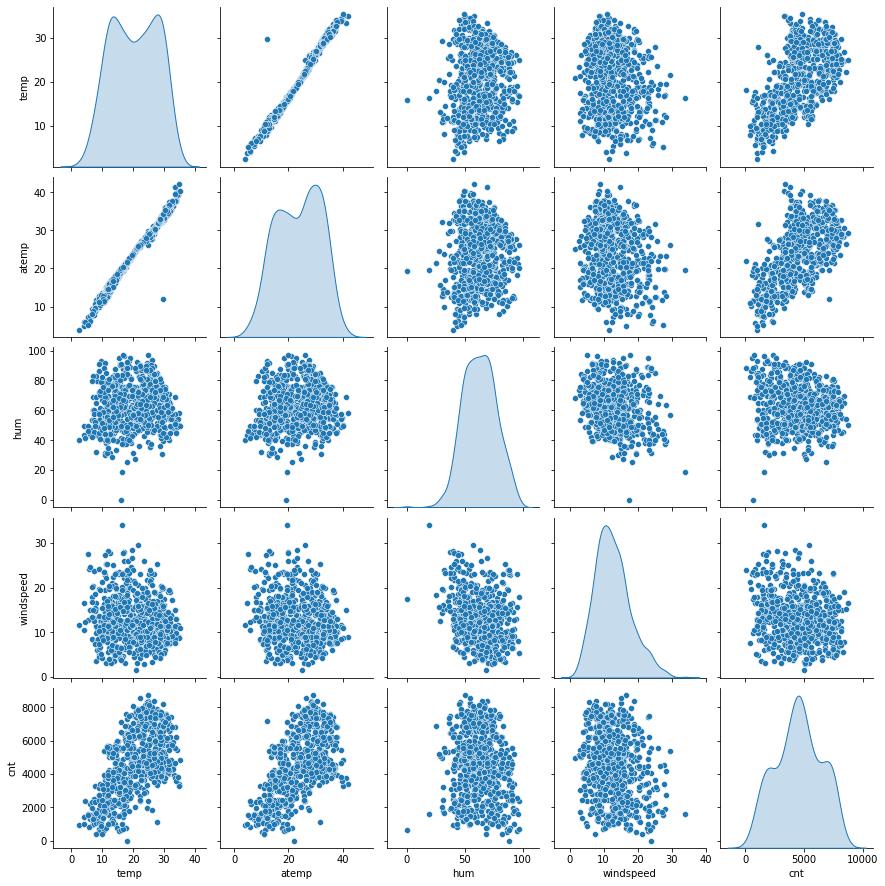

In [22]:
#visualising numerical data against cnt 
sns.pairplot(df1[['temp','atemp','hum','windspeed','cnt']],diag_kind='kde')
plt.show()

Inferences

*   temp and atemp are highly correlated to each other 
*   temp and atemp are (positively)correlated to cnt variable 
*   Either of temp and atemp can be dropped before model building as they are highly correlated





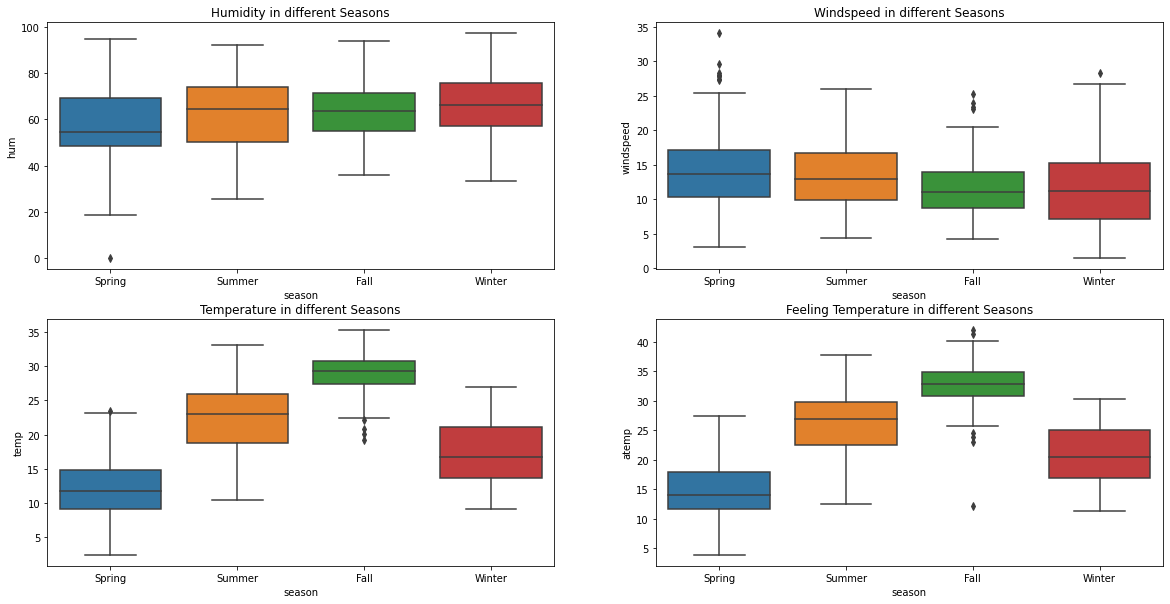

In [23]:
#visulaising the different climatic conditions across seassons
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
sns.boxplot(data=df1,x='season',y='hum')
plt.title("Humidity in different Seasons")
plt.subplot(2,2,2)
sns.boxplot(data=df1,y='windspeed',x='season')
plt.title("Windspeed in different Seasons")
plt.subplot(2,2,3)
sns.boxplot(data=df1,x='season',y='temp')
plt.title("Temperature in different Seasons")
plt.subplot(2,2,4)
sns.boxplot(data=df1,x='season',y='atemp')
plt.title("Feeling Temperature in different Seasons")
plt.show()

*   There's one data point with humidity as zero
(an outlier), which must can be dropped or imputed with mean value of humidity during Spring season.




In [24]:
#extracting the mean value of humidity in spring season
val=df1.groupby(by=['season']).mean()['hum']['Spring']
df1.loc[(df1['season']=="Spring")&(df1['hum']==0),'hum']=val

In [25]:
#checking dataframe for hum==0
df1[df1['hum']==0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


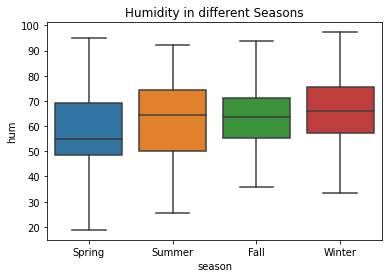

In [26]:
#plotting again to verify the difference
sns.boxplot(data=df1,x='season',y='hum')
plt.title("Humidity in different Seasons")
plt.show()

###Visualizing categorical values against target variable

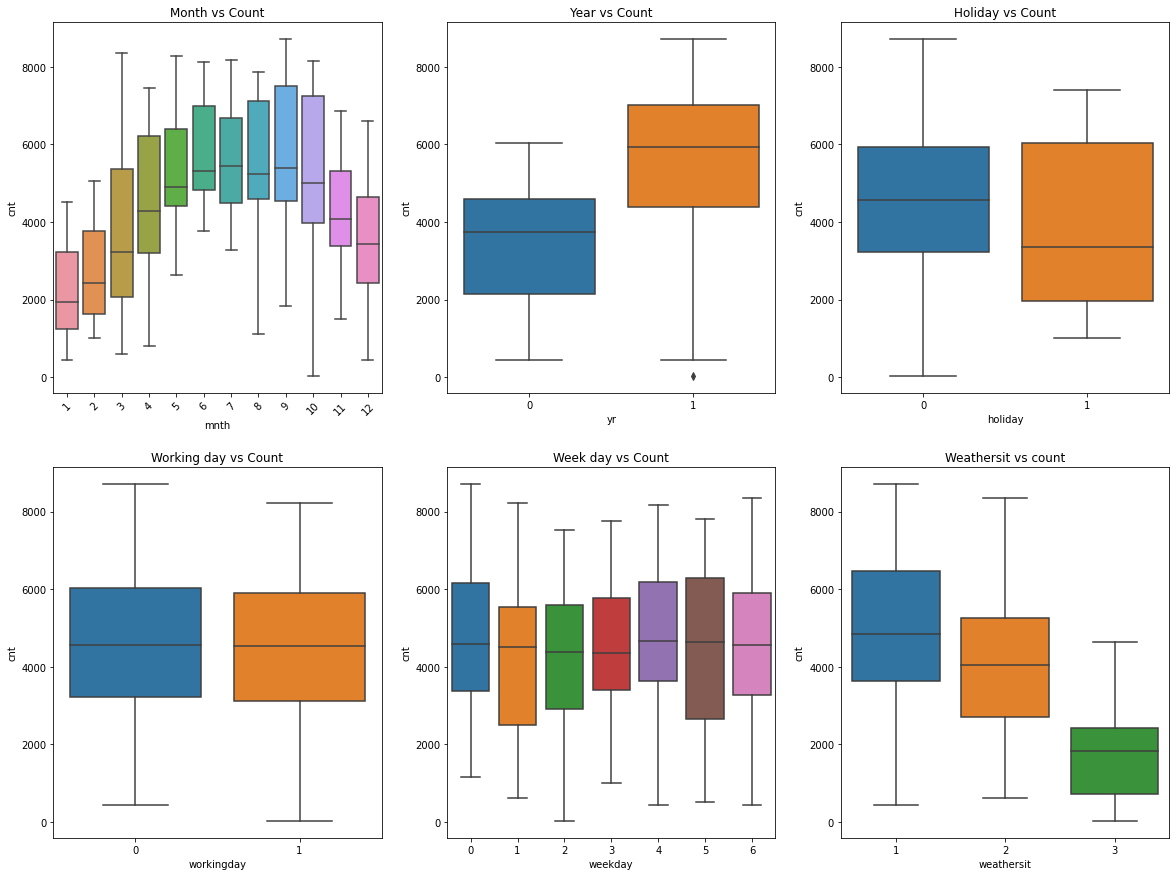

In [27]:
plt.figure(figsize=[20,15])
plt.subplot(2,3,1)
#Month vs Count 
sns.boxplot(data=df,x='mnth',y='cnt')
plt.xticks(rotation=45)
plt.title("Month vs Count")
plt.subplot(2,3,2)
#year vs count
sns.boxplot(data=df,x='yr',y='cnt')
plt.title("Year vs Count")
plt.subplot(2,3,3)
#holiday vs count
sns.boxplot(data=df,x='holiday',y='cnt')
plt.title("Holiday vs Count")
plt.subplot(2,3,4)
#Workingday vs count
sns.boxplot(data=df,x='workingday',y='cnt')
plt.title("Working day vs Count")
plt.subplot(2,3,5)
#Workingday vs count
sns.boxplot(data=df,x='weekday',y='cnt')
plt.title("Week day vs Count")
plt.subplot(2,3,6)
#Weathersit vs count
sns.boxplot(data=df,x='weathersit',y='cnt')
plt.title("Weathersit vs count")
plt.show()

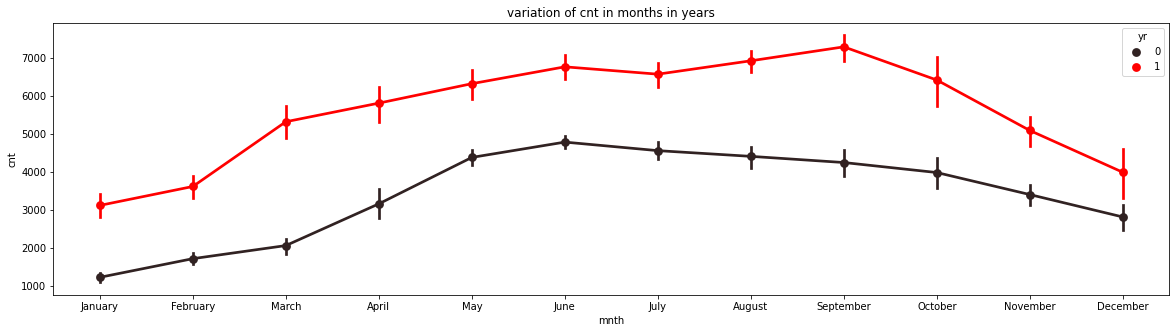

In [28]:
#Pointplot describing cnt across the two years ; 2018,2019
plt.figure(figsize=[20,5])
plt.title("variation of cnt in months in years")
sns.pointplot(data=df1,x='mnth',y='cnt',hue='yr',color='Red')
#plt.legend(["2018","2019"])
plt.show()

Inferences

*   We can see an increase in the cnt in the year 2019 compared to 2018



###Correlation Matrix

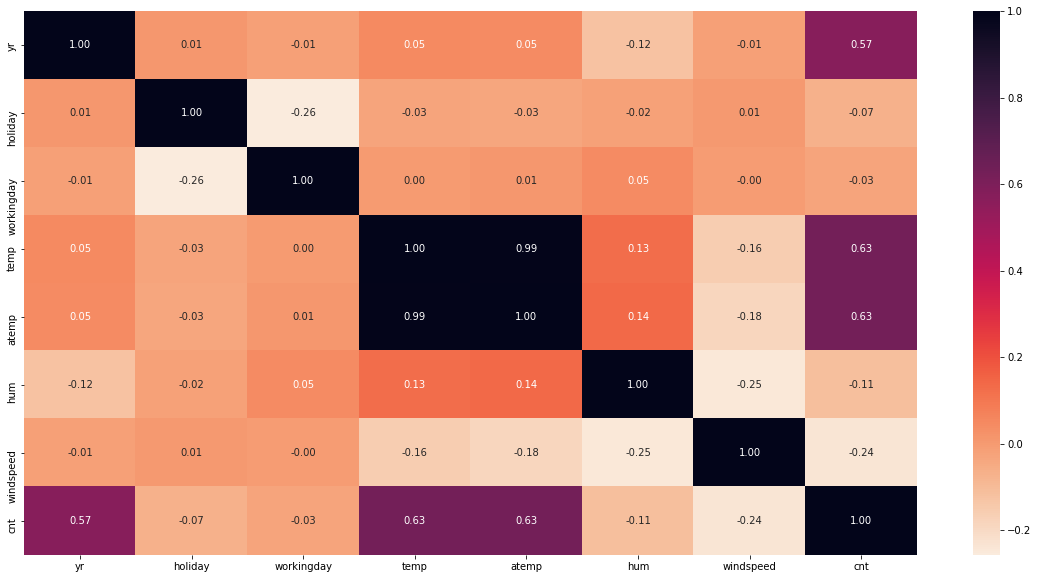

In [29]:
plt.figure(figsize=[20,10])
sns.heatmap(df1.corr(),annot=True,cmap='rocket_r',fmt=".2f")

Inferences


*   temp and atemp are highly correlated with each other 
*   Correlation of temp and atemp with cnt is similar and hence of these can be dropped for model building
*   There is a high positive correlation between year and cnt 





In [30]:
#dropping atemp from the dataframe
df1.drop('atemp',axis=1,inplace=True)

In [31]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,monday,1,2,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,tuesday,1,2,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,wednesday,1,1,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,thursday,1,1,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,friday,1,1,9.305237,43.6957,12.522300,1600


###Creating dummy variables

In [32]:
#creating dummy variables
df2=pd.get_dummies(df1[['mnth','weathersit','weekday','season']],drop_first=True)

In [33]:
df2.head()

,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_Summer,season_Fall,season_Winter
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
#concatenating the dummy dataframe with the original dataframe
df1=pd.concat([df1,df2],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_Summer,season_Fall,season_Winter
0,Spring,0,January,0,monday,1,2,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,Spring,0,January,0,tuesday,1,2,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,Spring,0,January,0,wednesday,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Spring,0,January,0,thursday,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Spring,0,January,0,friday,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [35]:
#drop the categorical data for which dummy variabkes where created
df1.drop(['mnth','weathersit','weekday','season'],axis=1,inplace=True)

In [36]:
df1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_Summer,season_Fall,season_Winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   cnt                730 non-null    int64  
 7   mnth_February      730 non-null    uint8  
 8   mnth_March         730 non-null    uint8  
 9   mnth_April         730 non-null    uint8  
 10  mnth_May           730 non-null    uint8  
 11  mnth_June          730 non-null    uint8  
 12  mnth_July          730 non-null    uint8  
 13  mnth_August        730 non-null    uint8  
 14  mnth_September     730 non-null    uint8  
 15  mnth_October       730 non-null    uint8  
 16  mnth_November      730 non

In [38]:
df1.shape

(730, 29)

###Splitting train and test data

In [39]:
#splitting the dataset, 70-30 train test split
df_train,df_test=train_test_split(df1,train_size=0.7,random_state=222)

In [40]:
df_train.shape

(510, 29)

In [41]:
df_test.shape

(220, 29)

###Scaling the train dataset

In [42]:
#scaling values in the train dataset
sc_X=MinMaxScaler()
scale=['temp','hum','windspeed','cnt']
df_train[scale]=sc_X.fit_transform(df_train[scale])

In [43]:
#check the train dataset after scaling
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_Summer,season_Fall,season_Winter
653,1,0,1,0.485936,0.405502,0.350441,0.864243,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
499,1,0,1,0.673265,0.744617,0.263207,0.585941,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
408,1,0,1,0.164646,0.194378,0.313027,0.391164,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
640,1,0,1,0.733166,0.743421,0.060717,0.868615,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
222,0,0,0,0.811582,0.212321,0.306798,0.548780,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [44]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_Summer,season_Fall,season_Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.713725,0.529489,0.505085,0.373391,0.517816,0.082353,0.076471,0.082353,0.086275,0.080392,0.096078,0.092157,0.088235,0.076471,0.074510,0.082353,0.335294,0.029412,0.166667,0.141176,0.145098,0.131373,0.150980,0.135294,0.252941,0.272549,0.233333
std,0.500487,0.151726,0.452463,0.240035,0.204961,0.190576,0.222145,0.275172,0.266010,0.275172,0.281045,0.272166,0.294988,0.289531,0.283915,0.266010,0.262857,0.275172,0.472557,0.169124,0.373044,0.348545,0.352545,0.338139,0.358381,0.342373,0.435124,0.445708,0.423368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318757,0.344797,0.236721,0.366371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545838,0.496411,0.358226,0.516107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.657297,0.478167,0.692648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
#dividing the target variable from the train set
y_train= df_train.pop('cnt')
y_train.head()

653    0.864243
499    0.585941
408    0.391164
640    0.868615
222    0.548780
Name: cnt, dtype: float64

In [46]:
X_train=df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_Summer,season_Fall,season_Winter
653,1,0,1,0.485936,0.405502,0.350441,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
499,1,0,1,0.673265,0.744617,0.263207,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
408,1,0,1,0.164646,0.194378,0.313027,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
640,1,0,1,0.733166,0.743421,0.060717,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
222,0,0,0,0.811582,0.212321,0.306798,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Applying RFE

In [47]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#Using RFE to select 15 significant features
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [49]:
#Inspect the features selected by RFE 
rfe15=pd.DataFrame()
rfe15['Features']=X_train.columns
rfe15['Feature Selected'] = rfe.support_
rfe15['Rank']=rfe.ranking_
rfe15.sort_values(by='Rank')

,Features,Feature Selected,Rank
0,yr,True,1
25,season_Summer,True,1
23,weekday_friday,True,1
22,weekday_thursday,True,1
21,weekday_wednesday,True,1
20,weekday_tuesday,True,1
19,weekday_monday,True,1
18,weathersit_3,True,1
26,season_Fall,True,1
13,mnth_September,True,1


'yr','season_Summer','weathersit_3','mnth_October','season_Fall','mnth_June','mnth_May','mnth_April','mnth_September','season_Winter','windspeed','holiday','hum','temp',mnth_March

In [50]:
#Reducing datset to include columns selected by RFE
X_rfe=X_train[['yr','season_Summer','weathersit_3','mnth_October','season_Fall','mnth_June','mnth_May','mnth_April','mnth_September','season_Winter','windspeed','holiday','hum','temp','mnth_March']]

In [51]:
X_rfe.shape

(510, 15)

###Model Building


####Model 1

In [52]:
#We have to add constant explicitly in stats model
X_rfe_cnst=sm.add_constant(X_rfe)
lm1=sm.OLS(y_train,X_rfe_cnst).fit()
# Checking the summary
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     151.4
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          1.04e-173
Time:                        16:56:23   Log-Likelihood:                 483.28
No. Observations:                 510   AIC:                            -934.6
Df Residuals:                     494   BIC:                            -866.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2419      0.021     11.764      0.000       0.201       0.282
yr                 0.2302      0.009     26.722      0.000       0.213       0.247
season_Summer      0.0753      0.025      2.987      0.003       0.026       0.125
weathersit_3      -0.1639      0.027     -6.091      0.000      -0.217      -0.111
mnth_October       0.0410      0.020      2.097      0.036       0.003       0.079
season_Fall        0.0884      0.023      3.897      0.000       0.044       0.133
mnth_June          0.0527      0.025      2.096      0.037       0.003       0.102
mnth_May           0.0833      0.029      2.855      0.004       0.026       0.141
mnth_April         0.0562      0.029      1.956      0.051      -0.000       0.113
mnth_September     0.1095      0.016      6.702      0.000       0.077       0.142
season_Winter      0.1545      0.015      9.987      0.000       0.124       0.185
windspeed         -0.1696      0.024     -7.029      0.000      -0.217      -0.122
holiday           -0.0845      0.028     -3.011      0.003      -0.140      -0.029
hum               -0.2108      0.024     -8.797      0.000      -0.258      -0.164
temp               0.4266      0.036     11.861      0.000       0.356       0.497
mnth_March         0.0404      0.019      2.111      0.035       0.003       0.078
==============================================================================
Omnibus:                       83.898   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.714
Skew:                          -0.903   Prob(JB):                     1.90e-38
Kurtosis:                       5.216   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#VIF Calculation lm1
vifdf=pd.DataFrame()
vifdf['features']=X_rfe.columns
vifdf['vif']=[variance_inflation_factor(X_rfe.values,i) for i in range(X_rfe.shape[1])]
vifdf['vif']=round(vifdf['vif'])
vifdf.sort_values(by='vif',ascending=False)

,features,vif
13,temp,21.0
1,season_Summer,9.0
4,season_Fall,8.0
12,hum,7.0
6,mnth_May,4.0
7,mnth_April,4.0
10,windspeed,4.0
5,mnth_June,3.0
9,season_Winter,3.0
0,yr,2.0


Inferences from Model 1

*   VIF value of temp is 21 which is >5 and thus needs to be dropped.



In [54]:
#drop temp from the dataframe
X_rfe.drop('temp',axis=1,inplace=True)

In [55]:
X_rfe.columns

Index(['yr', 'season_Summer', 'weathersit_3', 'mnth_October', 'season_Fall',
       'mnth_June', 'mnth_May', 'mnth_April', 'mnth_September',
       'season_Winter', 'windspeed', 'holiday', 'hum', 'mnth_March'],
      dtype='object')

####Model 2

In [56]:
#Building model 2
X_rfe_cnst=sm.add_constant(X_rfe)
lm2=sm.OLS(y_train,X_rfe_cnst).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     118.7
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          4.71e-148
Time:                        16:56:23   Log-Likelihood:                 419.38
No. Observations:                 510   AIC:                            -808.8
Df Residuals:                     495   BIC:                            -745.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3303      0.022     15.227      0.000       0.288       0.373
yr                 0.2432      0.010     25.126      0.000       0.224       0.262
season_Summer      0.1509      0.028      5.468      0.000       0.097       0.205
weathersit_3      -0.1878      0.030     -6.180      0.000      -0.247      -0.128
mnth_October       0.0957      0.021      4.453      0.000       0.053       0.138
season_Fall        0.3073      0.015     20.612      0.000       0.278       0.337
mnth_June          0.1492      0.027      5.538      0.000       0.096       0.202
mnth_May           0.1653      0.032      5.154      0.000       0.102       0.228
mnth_April         0.0781      0.032      2.406      0.016       0.014       0.142
mnth_September     0.1061      0.019      5.733      0.000       0.070       0.142
season_Winter      0.2073      0.017     12.357      0.000       0.174       0.240
windspeed         -0.1799      0.027     -6.589      0.000      -0.234      -0.126
holiday           -0.0721      0.032     -2.270      0.024      -0.134      -0.010
hum               -0.1664      0.027     -6.210      0.000      -0.219      -0.114
mnth_March         0.0552      0.022      2.553      0.011       0.013       0.098
==============================================================================
Omnibus:                       67.405   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.053
Skew:                          -0.716   Prob(JB):                     2.61e-33
Kurtosis:                       5.238   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#VIF Calculation lm2
vifdf=pd.DataFrame()
vifdf['features']=X_rfe.columns
vifdf['vif']=[variance_inflation_factor(X_rfe.values,i) for i in range(X_rfe.shape[1])]
vifdf['vif']=round(vifdf['vif'])
vifdf.sort_values(by='vif',ascending=False)

,features,vif
1,season_Summer,8.0
12,hum,5.0
6,mnth_May,4.0
7,mnth_April,4.0
5,mnth_June,3.0
9,season_Winter,3.0
10,windspeed,3.0
0,yr,2.0
3,mnth_October,2.0
4,season_Fall,2.0


Inferences from Model 2


*  season_Summer has the highest VIF value 8.0(>5) hence it can dropped.



In [58]:
#drop season_Summer 
X_rfe.drop('season_Summer',axis=1,inplace=True)
X_rfe.columns

Index(['yr', 'weathersit_3', 'mnth_October', 'season_Fall', 'mnth_June',
       'mnth_May', 'mnth_April', 'mnth_September', 'season_Winter',
       'windspeed', 'holiday', 'hum', 'mnth_March'],
      dtype='object')

####Model 3

In [59]:
#Building Model 3
X_rfe_cnst=sm.add_constant(X_rfe)
lm3=sm.OLS(y_train,X_rfe_cnst).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          7.66e-143
Time:                        16:56:23   Log-Likelihood:                 404.43
No. Observations:                 510   AIC:                            -780.9
Df Residuals:                     496   BIC:                            -721.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3417      0.022     15.384      0.000       0.298       0.385
yr                 0.2417      0.010     24.285      0.000       0.222       0.261
weathersit_3      -0.1869      0.031     -5.981      0.000      -0.248      -0.125
mnth_October       0.0959      0.022      4.339      0.000       0.052       0.139
season_Fall        0.2848      0.015     19.320      0.000       0.256       0.314
mnth_June          0.2539      0.019     13.044      0.000       0.216       0.292
mnth_May           0.3026      0.021     14.733      0.000       0.262       0.343
mnth_April         0.2188      0.020     10.737      0.000       0.179       0.259
mnth_September     0.1119      0.019      5.889      0.000       0.075       0.149
season_Winter      0.1928      0.017     11.316      0.000       0.159       0.226
windspeed         -0.1925      0.028     -6.878      0.000      -0.247      -0.137
holiday           -0.0737      0.033     -2.256      0.024      -0.138      -0.010
hum               -0.1540      0.027     -5.606      0.000      -0.208      -0.100
mnth_March         0.0953      0.021      4.551      0.000       0.054       0.136
==============================================================================
Omnibus:                       60.398   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.767
Skew:                          -0.724   Prob(JB):                     3.97e-24
Kurtosis:                       4.724   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#VIF Calculation lm3
vifdf=pd.DataFrame()
vifdf['features']=X_rfe.columns
vifdf['vif']=[variance_inflation_factor(X_rfe.values,i) for i in range(X_rfe.shape[1])]
vifdf['vif']=round(vifdf['vif'])
vifdf.sort_values(by='vif',ascending=False)

,features,vif
11,hum,5.0
9,windspeed,3.0
0,yr,2.0
2,mnth_October,2.0
3,season_Fall,2.0
8,season_Winter,2.0
1,weathersit_3,1.0
4,mnth_June,1.0
5,mnth_May,1.0
6,mnth_April,1.0


Inferences from Model 3

*   As humidity has a high VIF value, it can be dropped.




In [61]:
#drop hum from the dataset
X_rfe.drop('hum',axis=1,inplace=True)
X_rfe.columns

Index(['yr', 'weathersit_3', 'mnth_October', 'season_Fall', 'mnth_June',
       'mnth_May', 'mnth_April', 'mnth_September', 'season_Winter',
       'windspeed', 'holiday', 'mnth_March'],
      dtype='object')

####Model 4

In [62]:
X_rfe_cnst=sm.add_constant(X_rfe)
lm4=sm.OLS(y_train,X_rfe_cnst).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     118.6
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          2.54e-137
Time:                        16:56:24   Log-Likelihood:                 388.77
No. Observations:                 510   AIC:                            -751.5
Df Residuals:                     497   BIC:                            -696.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2577      0.017     15.255      0.000       0.225       0.291
yr                 0.2487      0.010     24.448      0.000       0.229       0.269
weathersit_3      -0.2411      0.031     -7.873      0.000      -0.301      -0.181
mnth_October       0.0832      0.023      3.673      0.000       0.039       0.128
season_Fall        0.2804      0.015     18.492      0.000       0.251       0.310
mnth_June          0.2540      0.020     12.663      0.000       0.215       0.293
mnth_May           0.2782      0.021     13.455      0.000       0.238       0.319
mnth_April         0.2137      0.021     10.188      0.000       0.172       0.255
mnth_September     0.0941      0.019      4.877      0.000       0.056       0.132
season_Winter      0.1843      0.017     10.541      0.000       0.150       0.219
windspeed         -0.1589      0.028     -5.644      0.000      -0.214      -0.104
holiday           -0.0721      0.034     -2.143      0.033      -0.138      -0.006
mnth_March         0.0951      0.022      4.412      0.000       0.053       0.137
==============================================================================
Omnibus:                       69.284   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.750
Skew:                          -0.818   Prob(JB):                     2.21e-27
Kurtosis:                       4.760   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vifdf=pd.DataFrame()
vifdf['features']=X_rfe.columns
vifdf['vif']=[variance_inflation_factor(X_rfe.values,i) for i in range(X_rfe.shape[1])]
vifdf['vif']=round(vifdf['vif'])
vifdf.sort_values(by='vif',ascending=False)

,features,vif
9,windspeed,3.0
0,yr,2.0
2,mnth_October,2.0
3,season_Fall,2.0
8,season_Winter,2.0
1,weathersit_3,1.0
4,mnth_June,1.0
5,mnth_May,1.0
6,mnth_April,1.0
7,mnth_September,1.0


windspeed	
yr
mnth_October
season_Fall
season_Winter
weathersit_3
mnth_June
mnth_May
mnth_April
mnth_September
holiday
mnth_March

Inferences from Model 4


*   All VIF values are under 5.0
*   Since all p-values are less than 0.05 we can check continue to check if the model is fitting appropriately.



###Residual Analysis

In [64]:
#Sorting the coefficients of the final model
lm4.params.sort_values(ascending=False)

season_Fall       0.280445
mnth_May          0.278234
const             0.257727
mnth_June         0.253952
yr                0.248678
mnth_April        0.213689
season_Winter     0.184287
mnth_March        0.095133
mnth_September    0.094121
mnth_October      0.083221
holiday          -0.072124
windspeed        -0.158944
weathersit_3     -0.241051
dtype: float64

In [65]:
#Calculating residual from predicted value
y_train_pred = lm4.predict(X_rfe_cnst)
res=y_train-y_train_pred

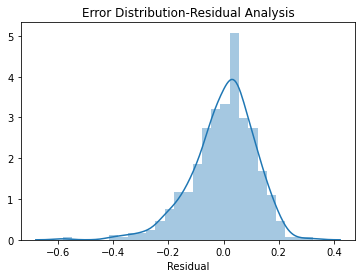

In [66]:
#plotting the residual to 
plt.title("Error Distribution-Residual Analysis")
sns.distplot(res)
plt.xlabel("Residual")
plt.ylabel("")
plt.show()

It can be seen that, the error is normally distributed around zero, it has modeled the assumption of Error Normal Distribution.

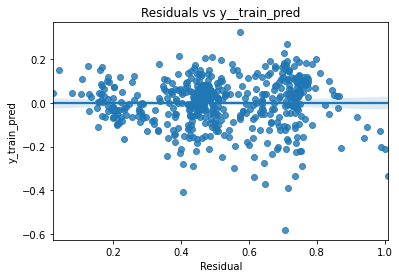

In [67]:
# Plotting Residuals vs y_predicted
plt.title("Residuals vs y__train_pred")
sns.regplot(x=y_train_pred, y=res)
plt.xlabel("Residual")
plt.ylabel("y_train_pred")
plt.show()

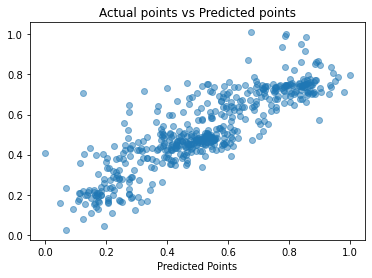

In [68]:
# Checking the Homoscedasticity property by plotting the predicted points vs Actual points
plt.title("Actual points vs Predicted points")
plt.scatter(x=y_train,y=y_train_pred, alpha=0.5)
plt.xlabel("Actual Points")
plt.xlabel("Predicted Points")
plt.show()

Inference 


*   There is no specific pattern between Residual and y_train_pred, no specific pattern formed.



###Testing the Model

In [69]:
#Scaling the test dataset
df_test[scale]=sc_X.fit_transform(df_test[scale])

In [70]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_Summer,season_Fall,season_Winter
559,1,0,0,0.831190,0.653355,0.250040,0.824360,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
160,0,0,0,0.897854,0.533013,0.243598,0.523894,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
717,1,0,1,0.352718,0.559105,0.333354,0.609759,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
34,0,0,0,0.196344,0.507732,0.217385,0.161014,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
318,0,0,1,0.607545,0.640042,0.365392,0.474593,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


In [71]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_February,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_August,mnth_September,mnth_October,mnth_November,mnth_December,weathersit_2,weathersit_3,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,season_Summer,season_Fall,season_Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000
mean,0.495455,0.040909,0.636364,0.545005,0.565170,0.342353,0.509720,0.063636,0.104545,0.081818,0.081818,0.086364,0.059091,0.068182,0.068182,0.104545,0.100000,0.090909,0.340909,0.027273,0.090909,0.150000,0.136364,0.168182,0.122727,0.159091,0.250,0.222727,0.268182
std,0.501120,0.198531,0.482143,0.234049,0.172849,0.166935,0.246101,0.244661,0.306665,0.274713,0.274713,0.281541,0.236333,0.252632,0.252632,0.306665,0.300684,0.288135,0.475096,0.163248,0.288135,0.357886,0.343957,0.374881,0.328872,0.366595,0.434,0.417026,0.444023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.338472,0.442092,0.221167,0.340090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.522065,0.571619,0.308030,0.524146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751355,0.681073,0.435567,0.678162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000


In [72]:
#Split the target variable from other variables
y_test=df_test.pop('cnt')
X_test=df_test

In [73]:
X_test.shape

(220, 28)

In [74]:
y_test.shape

(220,)

In [75]:
#Filtering columns from the last model
col=['windspeed','yr','mnth_October','season_Fall','season_Winter','weathersit_3','mnth_June','mnth_May','mnth_April','mnth_September','holiday','mnth_March']

In [76]:
# Filtering the test data on the basis of columns used in model 4
X_test=X_test[col]
X_test_cnsnt=sm.add_constant(X_test)

In [77]:
X_test

,windspeed,yr,mnth_October,season_Fall,season_Winter,weathersit_3,mnth_June,mnth_May,mnth_April,mnth_September,holiday,mnth_March
559,0.250040,1,0,1,0,0,0,0,0,0,0,0
160,0.243598,0,0,0,0,0,1,0,0,0,0,0
717,0.333354,1,0,0,1,0,0,0,0,0,0,0
34,0.217385,0,0,0,0,0,0,0,0,0,0,0
318,0.365392,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.144876,0,1,0,1,0,0,0,0,0,0,0
175,0.385880,0,0,1,0,0,1,0,0,0,0,0
29,0.106357,0,0,0,0,0,0,0,0,0,0,0
74,0.372575,0,0,0,0,0,0,0,0,0,0,1


In [78]:
#Predicting Test data
y_test_pred=lm4.predict(X_test_cnsnt)

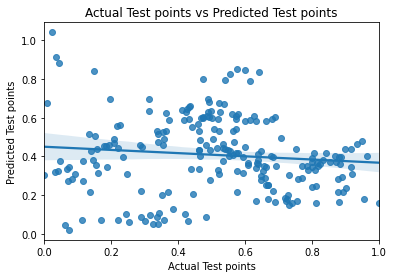

In [79]:
# Plotting the predicted test points with the actual test points
plt.title("Actual Test points vs Predicted Test points")
sns.regplot(y_test, y_test_pred)
plt.xlabel("Actual Test points")
plt.ylabel("Predicted Test points")
plt.show()

In [80]:
# Generating r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

-0.9569736637415218

###Final Inferences



*   season_Fall has the highest coefficient of 0.280445 , i.e. for an increase in the temperature , the bike renting count goes up by 0.280445 times
*   yr has a coefficient of 0.248678, indicating that for an increase in unit year, the bike renting count increases by 0.248678 times
*   During the month of May, the bike hire increases.


